We load the required libraries.

[Numpy](https://numpy.org/doc/stable/) is used for vector and matrix operations.

[Pyplot](https://matplotlib.org/2.0.2/api/pyplot_api.html) is a plotting software to draw graphs and display images.

PIL loads the image from file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Load the image and and display it with pyplot.

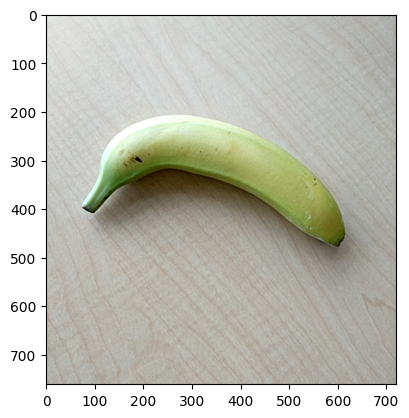

In [2]:
img = Image.open("images/banana.png")
img = np.asarray(img, dtype=np.ubyte)
plt.imshow(img)

We define a helper function to display multiple images for later use.

In [3]:
def show_images(imgs, names = None):
    fig, axes = plt.subplots(1, len(imgs))
    fig.set_size_inches(len(imgs) * 5, 5)
    if not names:
        names = [''] * len(imgs)
    for img, ax, name in zip(imgs, axes, names):
        ax.imshow(img, cmap='grey')
        ax.title.set_text(name)
    plt.show()

# Digitalization

An image is stores as a *tensor* of rank $[w,h,c]$, where:
- $w$: The width of the image.
- $y$: The height of the image.
- $c$: The channels of the image, usually in RGB (red, green, blue) and alpha (a).


To inspect each channel, we transpose the representation of the image (swap ranks) to get a vector of the three image channels.

In [4]:
img = img / 255
channels = np.transpose(img, (2, 0, 1))
R,G,B = channels[:3]

Display every channel of the image.

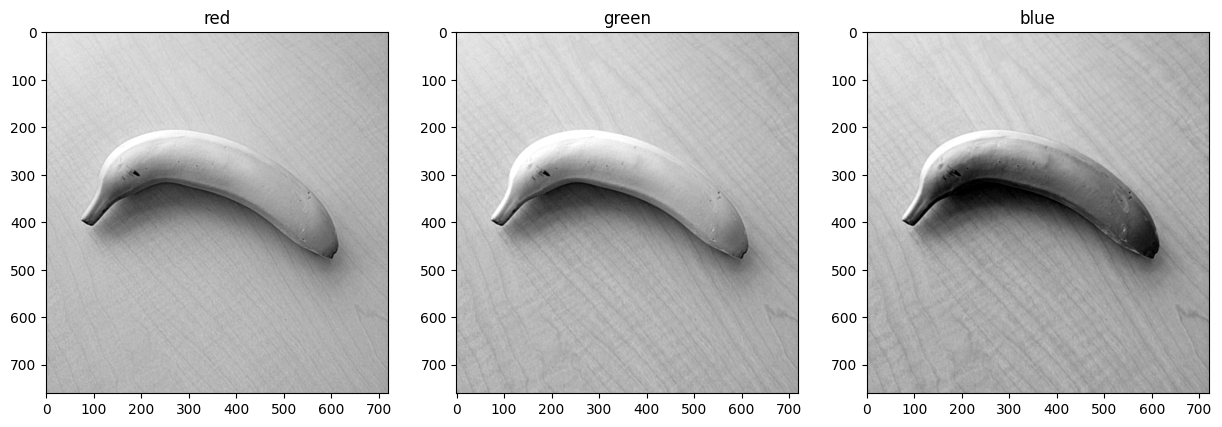

In [5]:
show_images([R,G,B], ['red', 'green', 'blue'])

## HSV representation

There are other representations, like HSV:

It uses the *chroma* $C$:
$$
max = max(R,G,B)\\
min = min(R,G,B)\\
C = max -min
$$

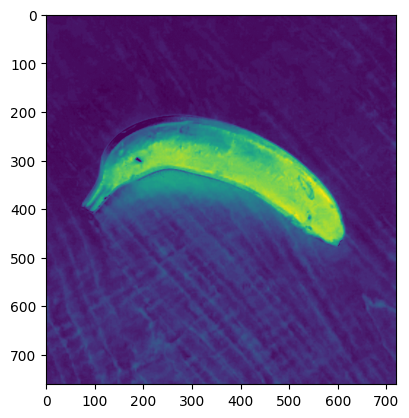

In [6]:

def chroma(R,G,B):
    max = np.max([R,G,B], 0)
    min = np.min([R,G,B], 0)
    return max-min
plt.imshow(chroma(R,G,B))

Then calculates the hue $H$:
$$
H' =\\
H = 60\deg \times H'
$$

C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:6: RuntimeWarning: invalid value encountered in divide
  HR = np.mod((G-B)/C, 6)
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:7: RuntimeWarning: invalid value encountered in divide
  HG = (B-R)/C + 2
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:8: RuntimeWarning: invalid value encountered in divide
  HB = (R-G)/C + 4


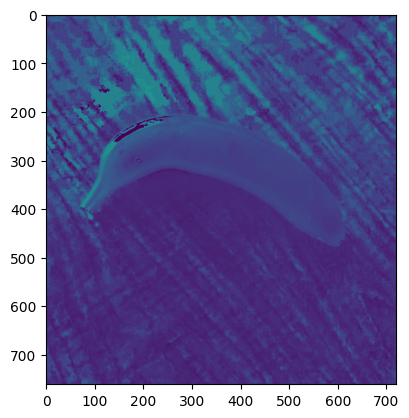

In [28]:
R,G,B,A = channels

def hue(R,G,B):
    C = chroma(R,G,B)
    max = np.max([R,G,B], 0)
    HR = np.mod((G-B)/C, 6)
    HG = (B-R)/C + 2
    HB = (R-G)/C + 4
    H = np.where(np.logical_and(R == max, C>0), HR, 0)
    H = np.where(np.logical_and(G == max, C>0), HG, H)
    H = np.where(np.logical_and(B == max, C>0), HB, H)
    return H
plt.imshow(hue(R,G,B), vmin = 0, vmax = 6)

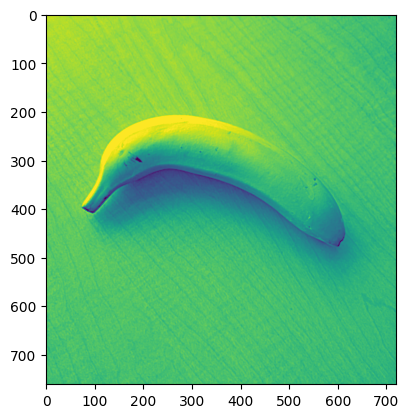

In [29]:
def value(R,G,B):
    return np.max([R,G,B], 0)

plt.imshow(value(R,G,B))

C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1856352355.py:2: RuntimeWarning: invalid value encountered in divide
  return chroma(R,G,B) / value(R,G,B)


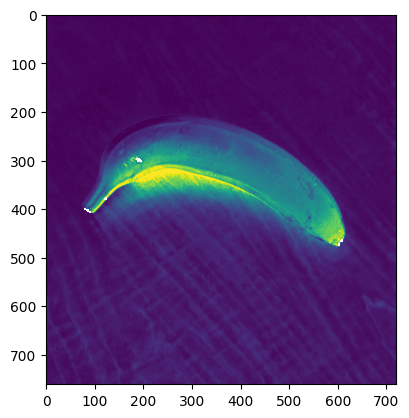

In [30]:
def saturation(R,G,B):
    return chroma(R,G,B) / value(R,G,B)

plt.imshow(saturation(R,G,B))

C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:6: RuntimeWarning: invalid value encountered in divide
  HR = np.mod((G-B)/C, 6)
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:7: RuntimeWarning: invalid value encountered in divide
  HG = (B-R)/C + 2
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:8: RuntimeWarning: invalid value encountered in divide
  HB = (R-G)/C + 4
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1856352355.py:2: RuntimeWarning: invalid value encountered in divide
  return chroma(R,G,B) / value(R,G,B)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\P.Mascha\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


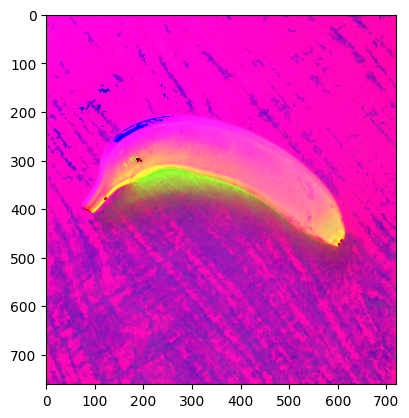

In [31]:
def to_HSV(R,G,B):
    return hue(R,G,B), saturation(R,G,B), value(R,G,B)

plt.imshow(np.transpose(to_HSV(R,G,B), [1,2,0]))

The HSV representation can be calculated by inversing the operations.

This is done by using this shorthand taken from [wikipedia](https://de.wikipedia.org/wiki/HSV-Farbraum#:~:text=In%20HSV%20ist%20der%20Farbort,%25%20%3D%20ges%C3%A4ttigte%2C%20reine%20Farbe).

C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:6: RuntimeWarning: invalid value encountered in divide
  HR = np.mod((G-B)/C, 6)
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:7: RuntimeWarning: invalid value encountered in divide
  HG = (B-R)/C + 2
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:8: RuntimeWarning: invalid value encountered in divide
  HB = (R-G)/C + 4
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1856352355.py:2: RuntimeWarning: invalid value encountered in divide
  return chroma(R,G,B) / value(R,G,B)


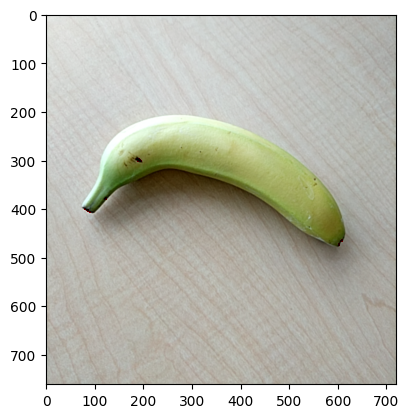

In [32]:
def to_RGB(H,S,V):
    h = np.floor(H)
    f = H - h
    p = V * (1-S)
    q = V * (1 - S * f)
    t = V * (1 - S * (1-f))
    rgb = np.where(h == 1, [q, V, p], [V,t,p])
    rgb = np.where(h == 2, [p, V, t], rgb)
    rgb = np.where(h == 3, [p, q, V], rgb)
    rgb = np.where(h == 4, [t, p, V], rgb)
    rgb = np.where(h == 5, [V,p,q], rgb)
    return rgb

h,s,v = to_HSV(R,G,B)
r,g,b = to_RGB(h,s,v)
rec_img = np.transpose([r,g,b], [1,2,0])
plt.imshow(rec_img)

Task:
Eperience what happens when manipulating the values in HSV space!

C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:6: RuntimeWarning: invalid value encountered in divide
  HR = np.mod((G-B)/C, 6)
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:7: RuntimeWarning: invalid value encountered in divide
  HG = (B-R)/C + 2
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:8: RuntimeWarning: invalid value encountered in divide
  HB = (R-G)/C + 4
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1856352355.py:2: RuntimeWarning: invalid value encountered in divide
  return chroma(R,G,B) / value(R,G,B)


c:\Users\P.Mascha\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


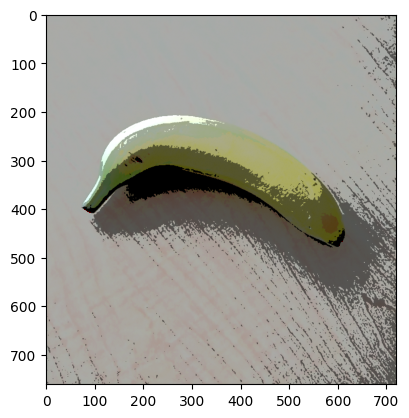

In [59]:
h,s,v = to_HSV(R,G,B)
#v = np.full_like(v, 0.5)
#s = np.full_like(s, 1)
#h = (h + 3) % 6
v = np.floor(v*3) / 3
h = np.floor(h*3) / 3
r,g,b = to_RGB(h,s,v)
rec_img = np.transpose([r,g,b], [1,2,0])
plt.imshow(rec_img)

There are other, similar representations:
- HSL: Relative **l**ightness
- HSB: **B**rightness
- HSI: **I**ntensity

## Gamma correction

Light values may be mapped to other ranges, for example by using [gamma correction](https://en.wikipedia.org/wiki/Gamma_correction).

It maps all values in a non-linear fashion by exponating with $\gamma$:
$$
img_{out} = img^\gamma
$$

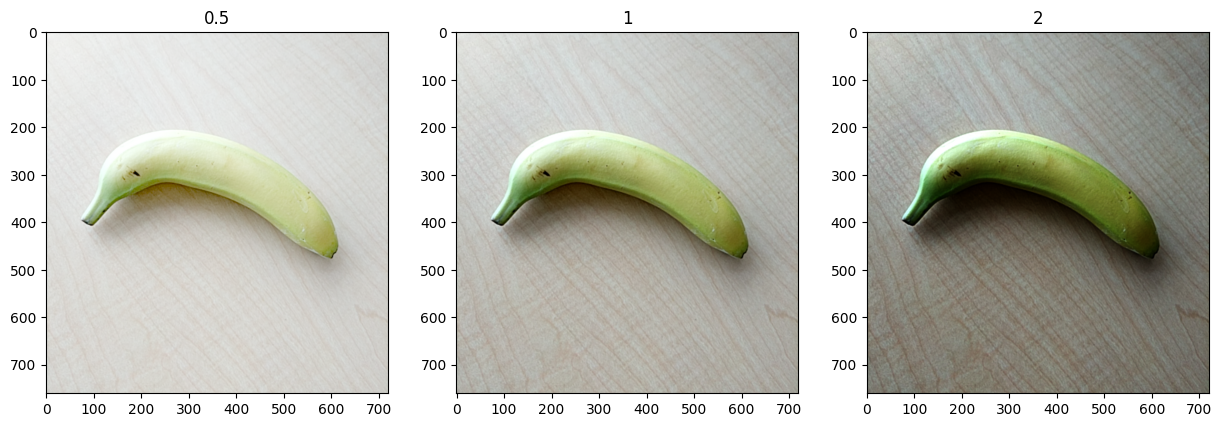

In [34]:
def gamma_cor(img, gamma: float):
    return img ** gamma

a = gamma_cor(img, 0.5)
b = gamma_cor(img, 1)
c = gamma_cor(img, 2)

show_images([a,b,c], [0.5,1,2])

# Filters


We select our grayscale image.

In [35]:
image = channels[1]

## Fourier Transform
Images are 2 dimensional signals where $x$ and $y$ are their coordinates in space with $0<x<w$ and $0<y<h$:

$$
img(x,y)
$$

Like in 1D signal processing, we can represent this function as frequencies:

$$
F(\omega_1, \omega_2) = \sum_{x=-\infty}^\infty \sum_{y=-\infty}^\infty img(x,y) e ^{-i\omega_1 x-i\omega_2 y}
$$

Since images are *discrete*, the discrete fourier transform (DFT) is used:

$$
F(p, q) = \sum_{x=0}^w \sum_{y=0}^h img(x,y) e ^{-\frac{i2 \pi x}{w}-\frac{i2 \pi y}{h}}
$$

More information on:
(https://de.mathworks.com/help/images/fourier-transform.html)


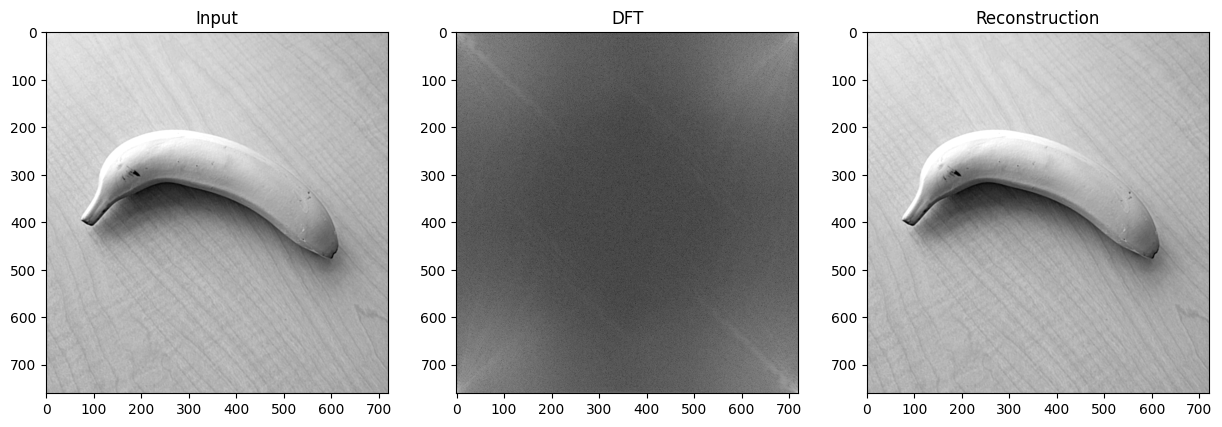

In [36]:
from scipy.fft import fftn, ifftn
import skimage
ft = fftn(image)
reconstr = np.real(ifftn(ft))
magnitudes = np.log(np.abs(ft))
show_images([image, magnitudes, reconstr], ["Input", "DFT", "Reconstruction"])


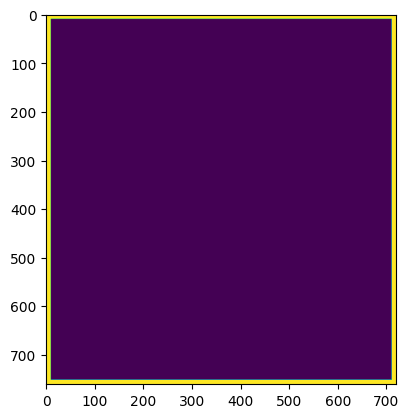

In [37]:
width = 10
rr, cc= skimage.draw.rectangle((width, width), np.array(ft.shape) - (width, width), shape=ft.shape)
mask = np.ones(ft.shape, bool)
mask[rr, cc] = False
plt.imshow(mask)

### Low pass filter

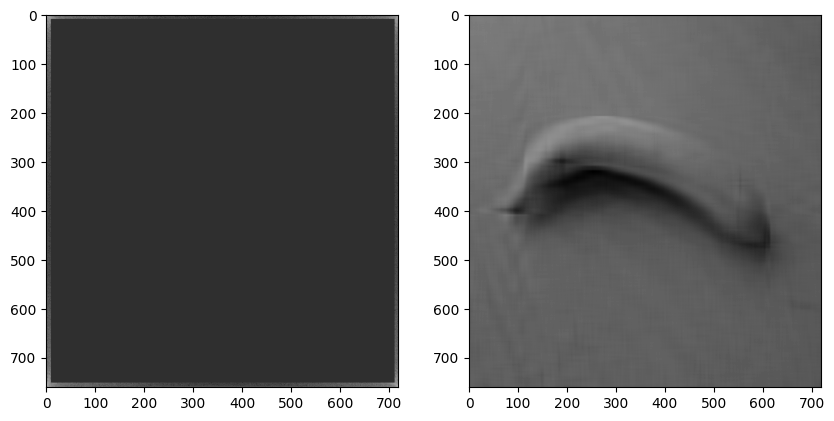

In [38]:
low_pass = np.copy(ft)
low_pass[rr, cc] = 1.
reconstr_lp = np.real(ifftn(low_pass))
show_images([np.log(np.abs(low_pass)), reconstr_lp])

### High pass filter

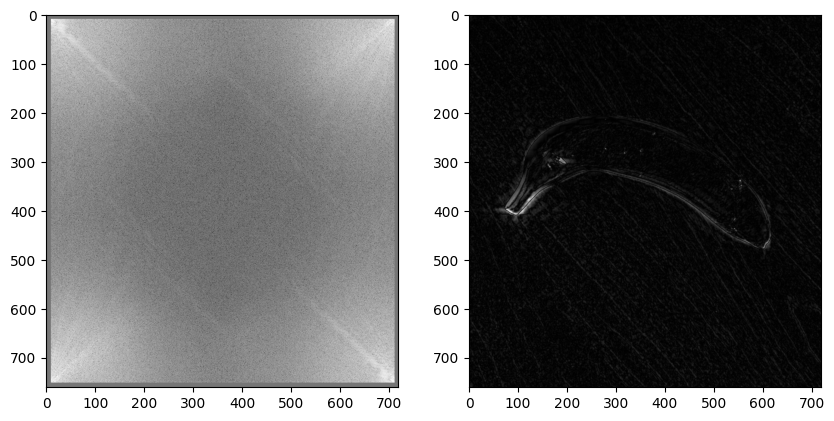

In [39]:
high_pass = np.copy(ft)
high_pass[mask] = 1.
reconstr_hp = np.abs(np.real(ifftn(high_pass)))
show_images([np.log(np.abs(high_pass)), reconstr_hp])

## Discrete Filters

We declare a function that lets us apply a discrete filter to an grayscale image:

In [40]:
def apply_filter(grayscale_img: np.ndarray, filter: np.ndarray):
    view_shape = tuple(np.subtract(grayscale_img.shape, filter.shape) + 1) + filter.shape
    sub_matrices = np.lib.stride_tricks.as_strided(grayscale_img,view_shape, grayscale_img.strides * 2)
    return np.einsum('ij,klij->kl',filter,sub_matrices)

### Edge Detection

We apply a [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) in both x and y direction.

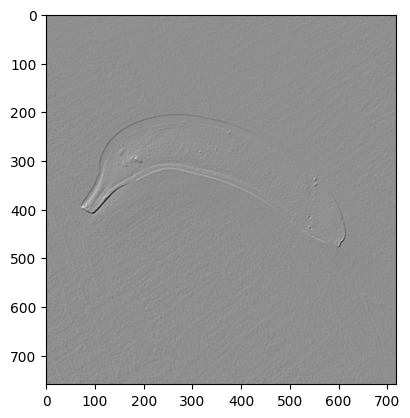

In [76]:

filter = np.array([[2,2,0],
                [2,0,-2],
                [0,-2,-2]])
filtered = apply_filter(G, filter)
plt.imshow(filtered, cmap='grey')

By only using the absolute, we receive the strength of each edge.

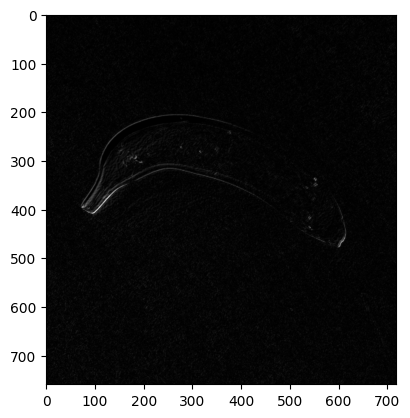

In [70]:
absolute = np.abs(filtered)
plt.imshow(absolute, cmap='grey')

By threshholding we only keep the significant edges.

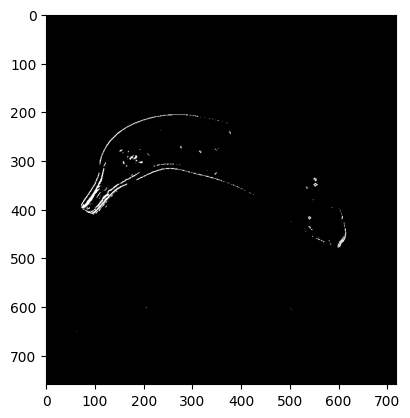

In [49]:
threshold = absolute > 0.5
plt.imshow(threshold, cmap='grey')

We can look at various thresholds for our image.

Often, the ideal threshold value depends on the image and task at hand.

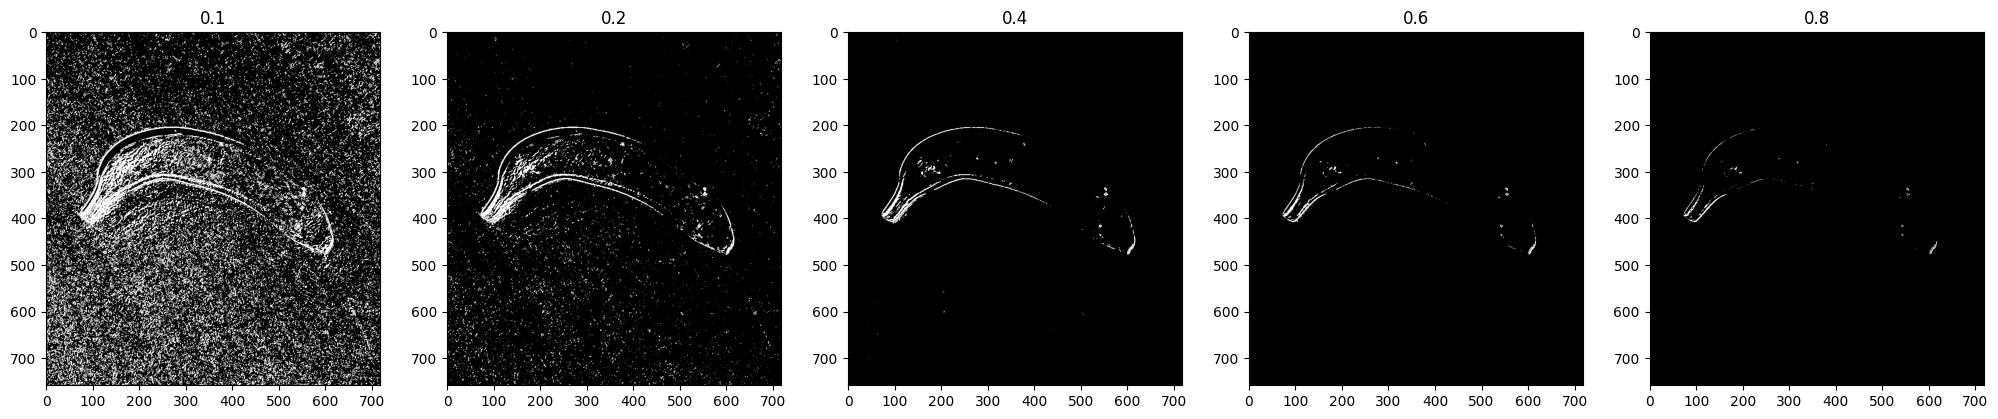

In [50]:
imgs = []
for t in [0.1,0.2,0.4,0.6,0.8]:
    imgs.append(absolute > t)
show_images(imgs, [0.1,0.2,0.4,0.6,0.8])

### Smoothing

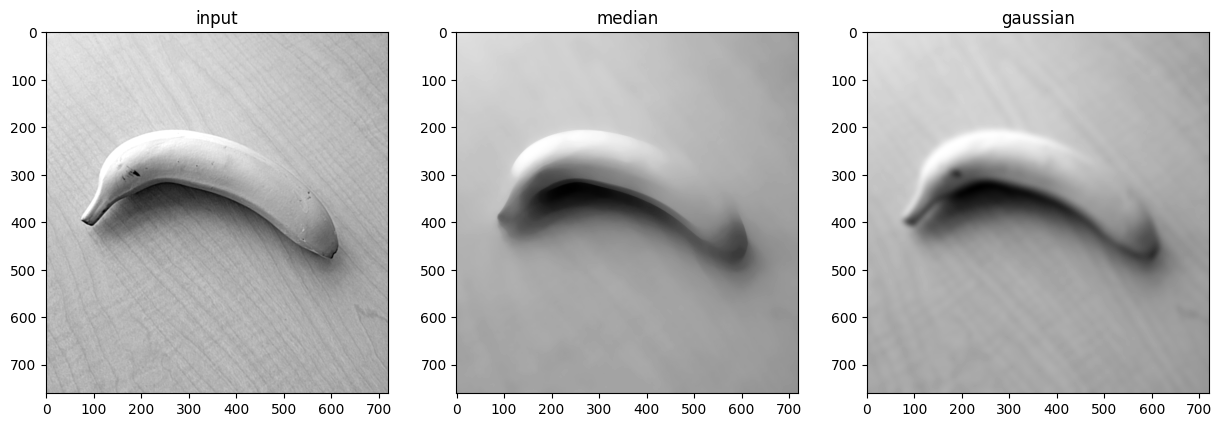

In [45]:
from skimage.filters import gaussian, median
from skimage.morphology import disk

med = median(image, footprint=disk(20))
gauss = gaussian(image, 6.)

show_images([image, med, gauss], ["input", "median", "gaussian"])

## Task: Comic filter

Use the known filters and conversions to make a comic-like filter!

C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:6: RuntimeWarning: invalid value encountered in divide
  HR = np.mod((G-B)/C, 6)
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:7: RuntimeWarning: invalid value encountered in divide
  HG = (B-R)/C + 2
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1407584610.py:8: RuntimeWarning: invalid value encountered in divide
  HB = (R-G)/C + 4
C:\Users\P.Mascha\AppData\Local\Temp\ipykernel_17484\1856352355.py:2: RuntimeWarning: invalid value encountered in divide
  return chroma(R,G,B) / value(R,G,B)


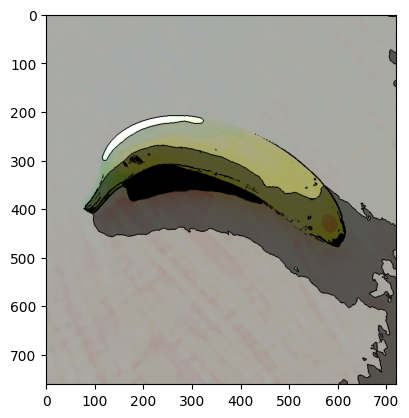

In [108]:
from skimage.filters import median, sobel
from skimage.morphology import disk
h,s,v = to_HSV(R,G,B)
v = np.floor(v*3) / 3
h = np.floor(h*3) / 3
v = median(v, footprint = disk(10))
h = median(h, footprint = disk(10))
edges = np.logical_and(sobel(v) < 0.1, sobel(s) < 0.08)
v = np.where(edges, v, 0.)
r,g,b = to_RGB(h,s,v)


rec_img = np.transpose([r,g,b], [1,2,0])

plt.imshow(rec_img)

# Features

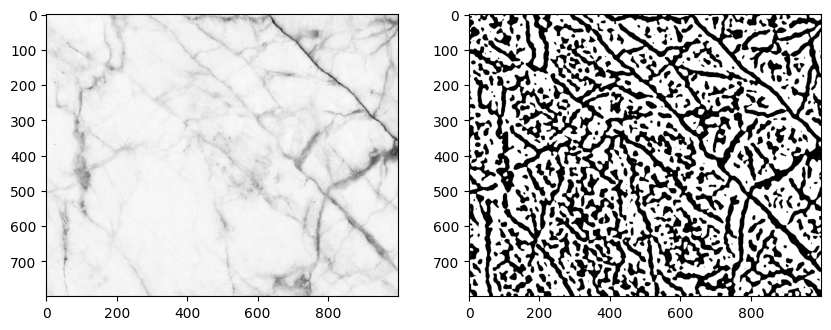

In [46]:
from skimage.filters import hessian

texture = np.asarray(Image.open("images/texture.png"), np.uint8)
gray = np.mean(texture, -1)
show_images([gray, hessian(gray, sigmas = range(5,6,1))])

### Frangi filter

The Frangi filter (https://link.springer.com/chapter/10.1007/BFb0056195#editor-information)[Frangi, A.F., Niessen, W.J., Vincken, K.L., Viergever, M.A. (1998). Multiscale vessel enhancement filtering. In: Wells, W.M., Colchester, A., Delp, S. (eds) Medical Image Computing and Computer-Assisted Intervention — MICCAI’98. MICCAI 1998. Lecture Notes in Computer Science, vol 1496. Springer, Berlin, Heidelberg. https://doi.org/10.1007/BFb0056195]
uses the hessian filter to search for tube-like structures. This is useful to find structural features like crags.

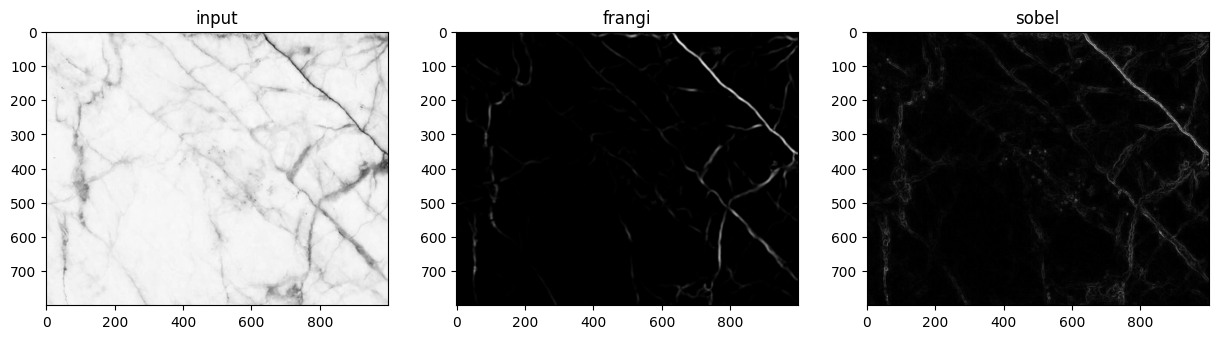

In [47]:
from skimage.filters import frangi, sobel

show_images([gray, frangi(gray, sigmas = range(5,6,1)), sobel(gray)], ["input", "frangi", "sobel"])

### Hough Transform

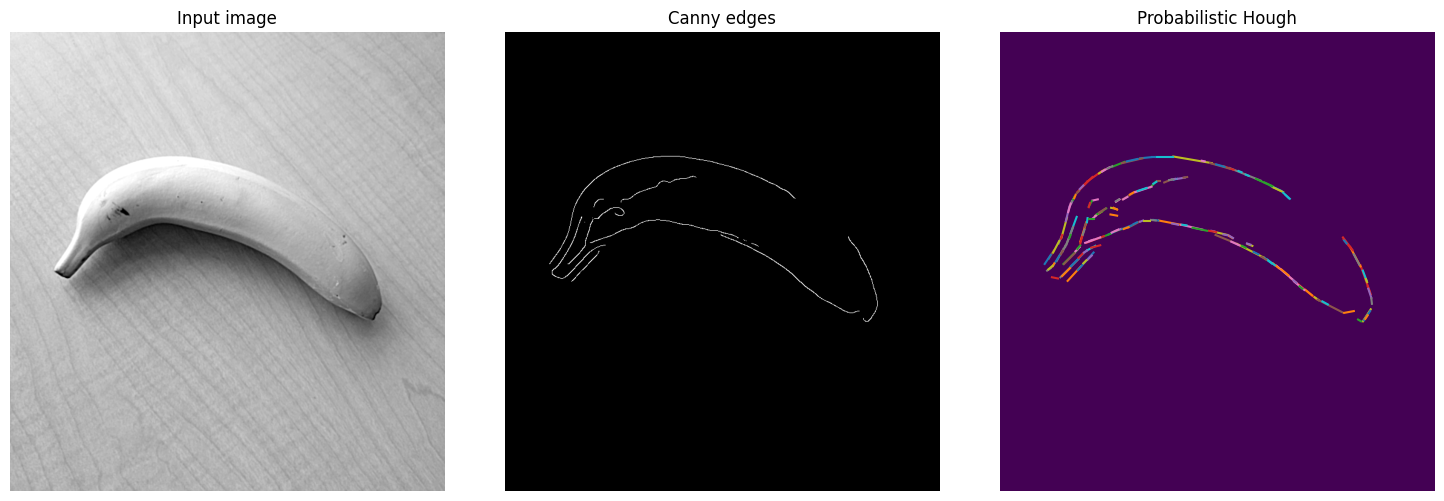

In [52]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny


edges = canny(channels[1] * 255, 5, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5, line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(channels[1], cmap="gray")
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap="gray")
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, channels[1].shape[1]))
ax[2].set_ylim((channels[1].shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()